# Dataset Information

In [135]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [136]:
Titanic_df = pd.read_csv('Dataset/train.csv')
Titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [137]:
Titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [138]:
Titanic_df.shape

(891, 12)

# Preprocessing the dataset

In [139]:
Titanic_df['Sex'] = Titanic_df['Sex'].map({'male':1,'female':0})

In [140]:
Titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [141]:
Titanic_df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

Remplir les NaN du feature 'Cabin'

<AxesSubplot:>

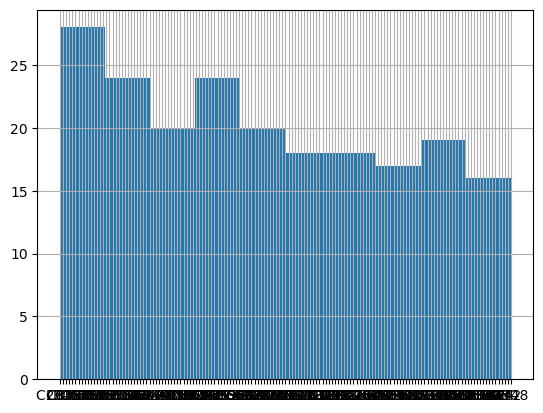

In [142]:
# histograms
Titanic_df['Cabin'].hist()

In [143]:
Titanic_df['Cabin'].fillna('C', inplace=True)
Titanic_df['Cabin']

0         C
1       C85
2         C
3      C123
4         C
       ... 
886       C
887     B42
888       C
889    C148
890       C
Name: Cabin, Length: 891, dtype: object

In [144]:
Titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [145]:
Titanic_df['Embarked'] = Titanic_df['Embarked'].map({'S':1, 'C':2, 'Q':0})

In [146]:
Titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.7+ KB


In [147]:
Titanic_df['Cabin'].unique()

array(['C', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [148]:
Titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [149]:
Titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,C,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,2.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,C,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,C,1.0


#Delete feature 'Ticket' and 'Name' because is not interesting enough for our dataset

In [150]:
Titanic_df.drop(['Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)

Replace with initial valeur function

In [151]:
def replace_with_initial_letter(strings):
    for i in range(len(strings)):
        strings[i] = strings[i][0]
    return strings

string = Titanic_df['Cabin'].unique()

new_strings = replace_with_initial_letter(string)

print(new_strings)

['C' 'C' 'C' 'E' 'G' 'C' 'D' 'A' 'C' 'B' 'D' 'B' 'C' 'B' 'C' 'F' 'F' 'E'
 'A' 'D' 'D' 'C' 'B' 'E' 'F' 'D' 'B' 'F' 'C' 'E' 'B' 'A' 'C' 'F' 'A' 'B'
 'B' 'A' 'D' 'D' 'C' 'C' 'D' 'C' 'B' 'E' 'B' 'C' 'C' 'C' 'D' 'A' 'B' 'D'
 'C' 'C' 'C' 'E' 'C' 'B' 'C' 'E' 'C' 'B' 'C' 'C' 'E' 'T' 'C' 'D' 'B' 'E'
 'C' 'B' 'E' 'E' 'A' 'C' 'C' 'C' 'E' 'D' 'E' 'E' 'A' 'B' 'C' 'D' 'B' 'E'
 'D' 'B' 'C' 'B' 'B' 'B' 'C' 'C' 'A' 'C' 'C' 'A' 'E' 'B' 'A' 'D' 'D' 'D'
 'A' 'B' 'A' 'D' 'E' 'C' 'B' 'B' 'D' 'B' 'B' 'F' 'C' 'E' 'C' 'C' 'E' 'B'
 'D' 'C' 'D' 'E' 'D' 'E' 'F' 'B' 'D' 'B' 'D' 'A' 'B' 'B' 'E' 'C' 'D' 'E'
 'A' 'C' 'B' 'C']


In [152]:
def replace_with_initial_letter(data):
    return [x[0] for x in data]

In [153]:
Titanic_df['Cabin'] = replace_with_initial_letter(Titanic_df['Cabin'])

In [154]:
Titanic_df['Cabin'].value_counts()

C    746
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

<AxesSubplot:>

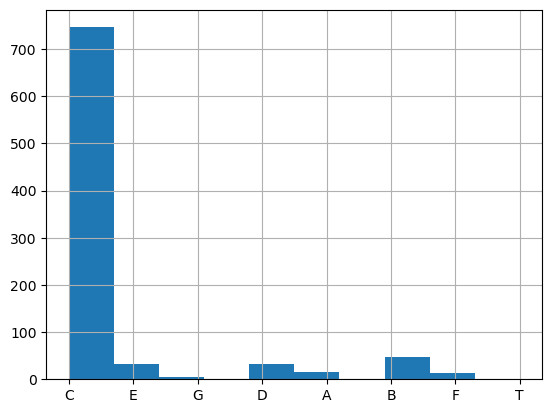

In [155]:
# histograms
Titanic_df['Cabin'].hist()

In [156]:
Titanic_df['Cabin'] = Titanic_df['Cabin'].map({'C':1, 'B':2, 'D':3, 'E':4, 'A':5, 'F':6, 'G':1, 'T':1})

In [157]:
Titanic_df['Cabin'] = Titanic_df['Cabin'].astype(int)

In [158]:
Titanic_df['Fare'].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

<AxesSubplot:>

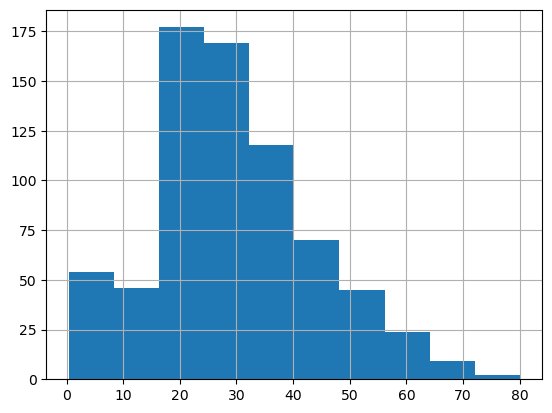

In [159]:
# histograms
Titanic_df['Age'].hist()

In [160]:
Titanic_df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [161]:
Titanic_df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

#Fill in the NaNs of the 'Age' column

In [162]:
median = Titanic_df['Age'].median()
Titanic_df['Age'].fillna(median, inplace=True)

In [163]:
median

28.0

In [164]:
#Change the type of 'Age' and 'Fare' in full

In [165]:
Titanic_df['Age'] = Titanic_df['Age'].astype(int)
Titanic_df['Fare'] = Titanic_df['Fare'].astype(int)

In [166]:
Titanic_df['Embarked'].value_counts()

1.0    644
2.0    168
0.0     77
Name: Embarked, dtype: int64

<AxesSubplot:>

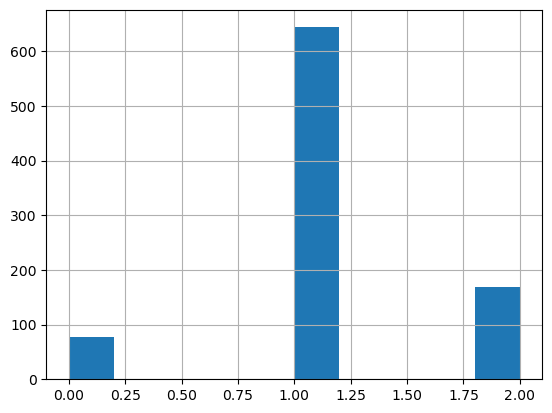

In [167]:
#Histogram
Titanic_df['Embarked'].hist()

In [168]:
Titanic_df['Embarked'].fillna('1.0', inplace=True)

In [169]:
Titanic_df['Sex'].unique()

array([1, 0], dtype=int64)

<AxesSubplot:>

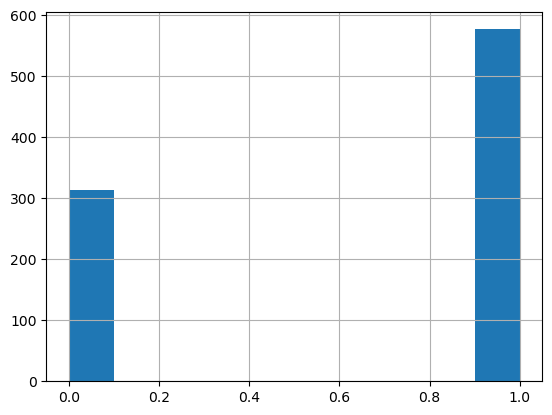

In [170]:
#Histogram
Titanic_df['Sex'].hist()

In [171]:
Titanic_df['Sex'].fillna('1', inplace=True)

#Recheck the existence of NaN

In [172]:
Titanic_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

Separate our x and y

In [173]:
y = Titanic_df['Survived']
X = Titanic_df.drop(['Survived'], axis=1)

In [174]:
X.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22,1,0,7,1,1.0
1,1,0,38,1,0,71,1,2.0
2,3,0,26,0,0,7,1,1.0
3,1,0,35,1,0,53,1,1.0
4,3,1,35,0,0,8,1,1.0


In [175]:
y.head(5)

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Separate the training and test data then train our model with the algorithm LogisticRegression

In [176]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

model = lr.fit(X_train, y_train)

Show predictions for test data

In [177]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1], dtype=int64)

Show accuracy_score

In [178]:
acc = accuracy_score(y_pred, y_test)

acc

0.8268156424581006

Show classification_report

In [179]:
cal = classification_report(y_pred, y_test)
print(cal)

              precision    recall  f1-score   support

           0       0.87      0.84      0.85       108
           1       0.77      0.80      0.79        71

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



Prediction test

In [180]:
d = Titanic_df.iloc[:1, :]
d

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22,1,0,7,1,1.0


In [181]:
Titanic_df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22,1,0,7,1,1.0
1,1,1,0,38,1,0,71,1,2.0
2,1,3,0,26,0,0,7,1,1.0
3,1,1,0,35,1,0,53,1,1.0
4,0,3,1,35,0,0,8,1,1.0


In [182]:
model.predict([[1,0,38,1,0,71,1,2]])

array([1], dtype=int64)

# Create pickle file 'model_titanic'

In [183]:
import pickle

In [184]:
with open('model_titanic.pkl', 'wb') as file:
    pickle.dump(model, file)

In [185]:
with open('model_titanic.pkl', 'rb') as file:
    model_survived = pickle.load(file)

Make predictions with our saved model

In [186]:
model_survived.predict([[1,0,38,1,0,71,1,2]])

array([1], dtype=int64)

# Partie supplementaire : Création des ensembles

In [187]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [188]:
# TODO : Importation des librairies
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import load_diabetes

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier, Perceptron, RidgeClassifier, SGDRegressor, PassiveAggressiveRegressor, LinearRegression, Lasso, ElasticNet, Ridge, HuberRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

from sklearn.cluster import KMeans, AgglomerativeClustering, Birch, DBSCAN, MiniBatchKMeans, MeanShift, OPTICS, AffinityPropagation
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier

In [189]:
#Creation d'un tableau pour contenier nos prediction de score
scores = []

In [190]:
# TODO (1) : Créez un modèle simple (pas un ensemble) et obtenez l'accuracy sur le dataset

rf_clf = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=42))
rf_clf.fit(X_train, y_train)
scores.append(['Random Forest Classifier', rf_clf.score(X_test, y_test)])

In [191]:
# TODO (2) : Créez un ensemble de Bagging et obtenez l'accuracy sur le dataset

rfc_bagging_clf = BaggingClassifier(base_estimator=make_pipeline(StandardScaler(), RandomForestClassifier()), random_state=42)
rfc_bagging_clf.fit(X_train, y_train)
scores.append(['Baggin RandomForestClassifier', rfc_bagging_clf.score(X_test, y_test)])

In [192]:
# TODO (3) : Créez un ensemble de Boosting et obtenez l'accuracy sur le dataset

gnc_boosting_clf = make_pipeline(GradientBoostingClassifier(random_state=42))
gnc_boosting_clf.fit(X_train, y_train)
scores.append(['Boosting Gradient Boosting Classifier', gnc_boosting_clf.score(X_test, y_test)])

In [193]:
# TODO (4) : Créez un VotingClassifier qui comprend un SVC et un decision tree, puis obtenez l'accuracy sur le dataset;

svc_pipe = make_pipeline(StandardScaler(), SVC(random_state=42))
dt_pipe = make_pipeline(DecisionTreeClassifier(random_state=42))

estimators = [('svc',svc_pipe), ('dt', dt_pipe)]

In [194]:
voting_clf = VotingClassifier(estimators=estimators)
voting_clf.fit(X_train, y_train)

scores.append(['VotingClassifier', voting_clf.score(X_test, y_test)])

In [195]:
# TODO (5) : Créez un modèle de Stacking qui comprend un SVC et un decisionTree, puis obtenez l'accuracy sur le dataset;
stacking_clf = StackingClassifier(estimators=estimators)
stacking_clf.fit(X_train, y_train)

scores.append(['StackingClassifier', stacking_clf.score(X_test, y_test)])

In [196]:
# Imprimez tous les scores obtenus dans un tableau
print(tabulate(scores, headers=['Classifier', 'Accuracy']))

Classifier                               Accuracy
-------------------------------------  ----------
Random Forest Classifier                 0.810056
Baggin RandomForestClassifier            0.793296
Boosting Gradient Boosting Classifier    0.815642
VotingClassifier                         0.804469
StackingClassifier                       0.815642
